In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_data.csv')

Root Mean Squared Error (RMSE): 110950.91000494867


C:\users\imran\onedrive\bureaublad\ironhack\week_5\mid_bootcamp_project\venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


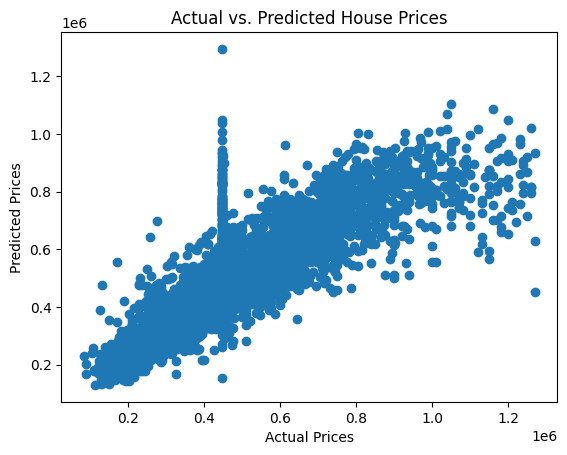

In [3]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Select relevant features and target variable
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15']]  # Include all relevant features
target = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

# Choose a regression model (Gradient Boosting Regressor)
model = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test_scaled)

# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualize predicted vs. actual prices
plt.scatter(y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()


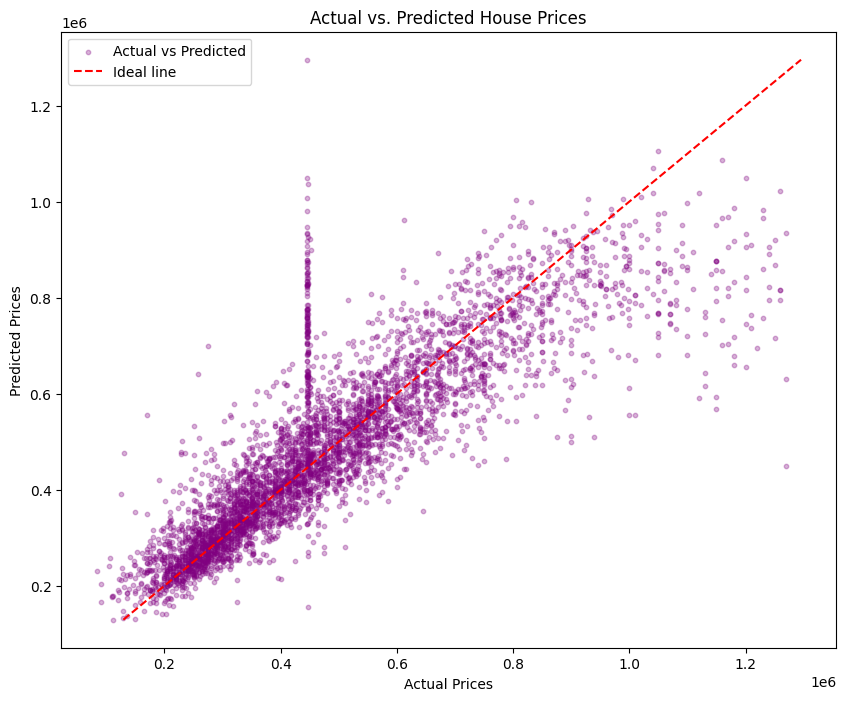

In [4]:
# Visualize predicted vs. actual prices with ideal line
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions, color='purple', alpha=0.3, label='Actual vs Predicted', s=10)
plt.plot([min(predictions), max(predictions)], [min(predictions), max(predictions)], color='red', linestyle='--', label='Ideal line')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.legend()
plt.show()


In [30]:
# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, predictions.round(), weights='linear')
print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.5304027265168063


In [5]:
import joblib

# Save the trained model to a file
joblib.dump(best_model, 'gradient_boosting_model.pkl')


['gradient_boosting_model.pkl']